# Exploration Exercises

In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from scipy.stats import pearsonr, spearmanr

import env
import wrangle

In [2]:
df = wrangle.wrangle_zillow()

In [3]:
df.head()

,bedrooms,bathrooms,sq_ft,home_value,year_built,location
0,4,2.0,3633,296425,2005,LA County
1,3,4.0,1620,847770,2011,LA County
2,3,2.0,2077,646760,1926,LA County
3,0,0.0,1200,5328,1972,LA County
4,0,0.0,171,6920,1973,LA County


In [4]:
df.shape

(2094583, 6)

1. As with encoded vs. unencoded data, we recommend exploring un-scaled data in your EDA process

2. Make sure to perform a train, validate, test split before and use only your train dataset to explore the relationships between independent variables with other independent variables or independent variables with your target variable.

In [5]:
def split_zillow(df):
    train_validate, test = train_test_split(df, test_size=.2,
                                        random_state=123)
    train, validate = train_test_split(train_validate, test_size=.3,
                                   random_state=123)
    return train, validate, test

In [6]:
train, validate, test = split_zillow(df)

In [7]:
train.shape

(1172966, 6)

3. Write a function named plot_variable_pairs that accepts a dataframe as input and plots all of the pairwise relationships along with the regression line for each pair.

In [8]:
train.sample(25)

,bedrooms,bathrooms,sq_ft,home_value,year_built,location
1460864,2,1.0,894,185680,1932,LA County
1852851,4,4.5,3825,1465489,2010,Orange County
889132,4,3.0,2876,146764,1966,Orange County
1857514,3,1.0,1336,354794,1909,LA County
261337,3,2.0,1546,352260,1976,Orange County
597416,3,2.0,1330,353676,1961,Ventura County
1136139,2,1.0,1090,46648,1924,LA County
1823413,3,2.0,1856,357427,1962,LA County
1090315,5,3.0,2663,419568,1979,Ventura County
1764450,2,1.0,662,258888,1930,LA County


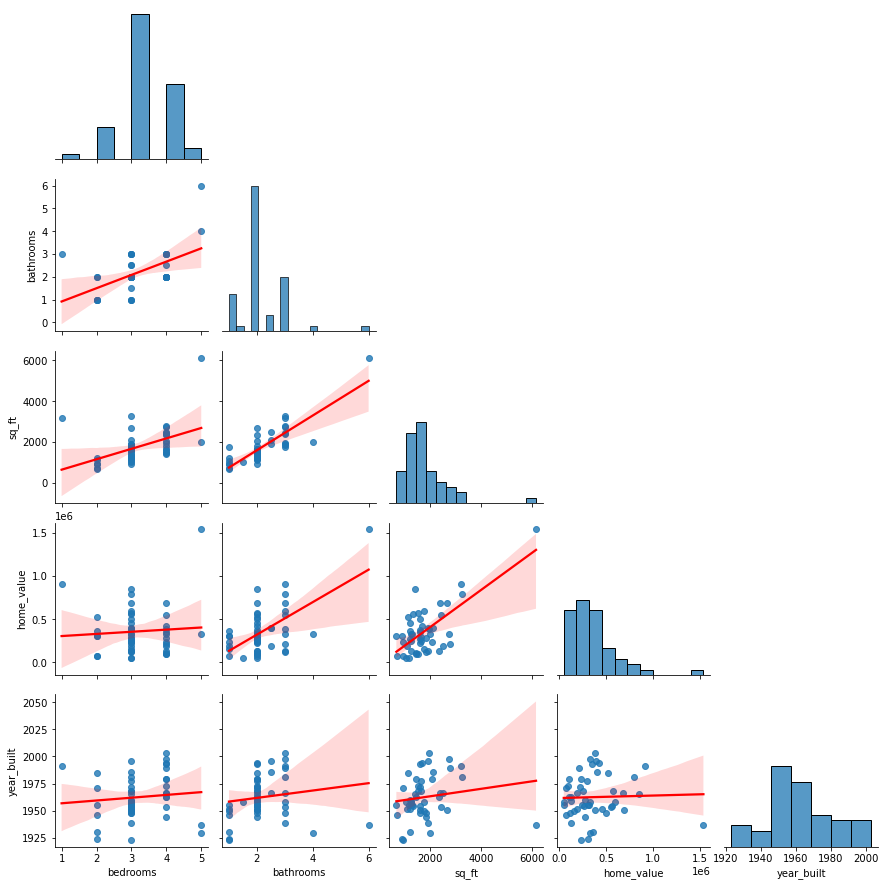

In [9]:
sns.pairplot(train.sample(50), kind='reg', corner=True, plot_kws={'line_kws':{'color':'red'}})

In [10]:
def plot_variable_pairs(df):
    train.sample(50)
    sns.pairplot(train.sample(50), kind='reg', corner=True, plot_kws={'line_kws':{'color':'red'}})

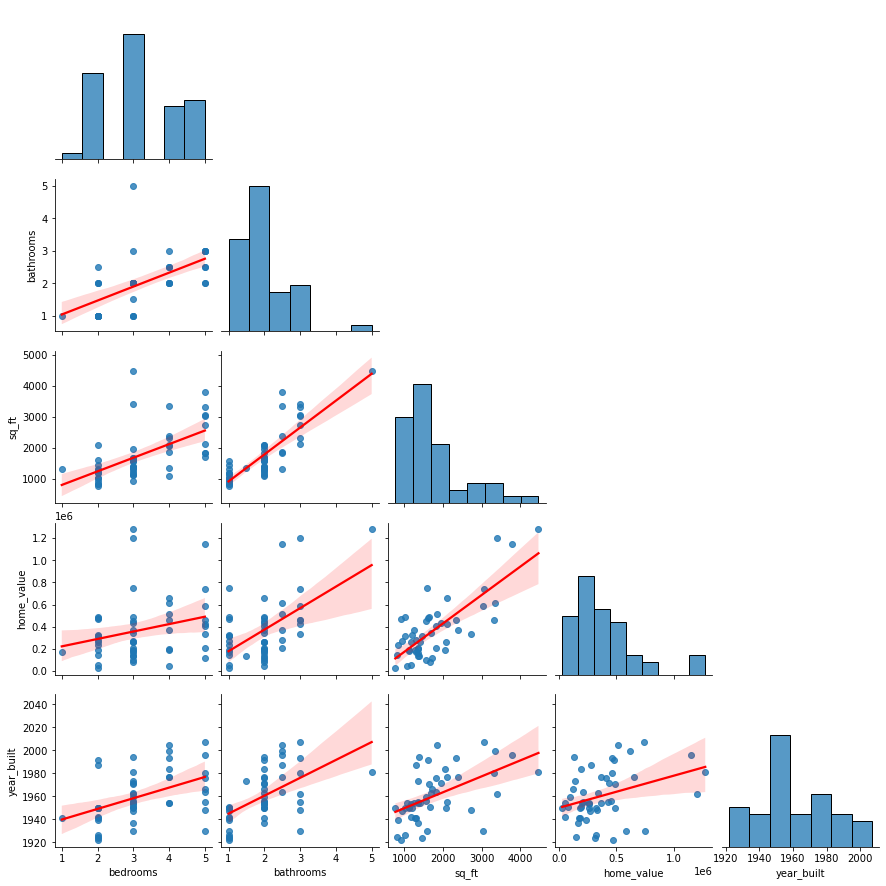

In [11]:
plot_variable_pairs(train)

**Takeaways**


4. Write a function named plot_categorical_and_continuous_vars that accepts your dataframe and the name of the columns that hold the continuous and categorical features and outputs 3 different plots for visualizing a categorical variable and a continuous variable.

Potential Categorical Variables (discrete) to investigate:
- bedroomcnt
- bathroomcnt
- yearbuilt
- fips

In [ ]:
cat_cols = ['bedroomcnt', 'bathroomcnt', 'yearbuilt', 'fips']
cont_cols = ['calculatedfinishedsquarefeet', 'taxvaluedollarcnt']

In [ ]:
def plot_categorical_and_continuous_vars(df, cat_cols, cont_cols):
    for cont in cont_cols:
        for cat in cat_cols:
            fig = plt.figure(figsize= (20, 10))
            fig.suptitle(f'{cont} vs {cat}')
            

            plt.subplot(131)
            sns.violinplot(data=df, x = cat, y = cont)
           

            plt.subplot(1, 3, 3)
            sns.histplot(data = df, x = cont, bins = 50, hue = cat)
            
            
            plt.subplot(1, 3, 2)
            sns.barplot(data = df, x = cat, y = cont)

In [ ]:
plot_categorical_and_continuous_vars(train, cat_cols, cont_cols)

In [ ]:
def plot_categorical_and_continuous_vars(df):
    

5. Save the functions you have written to create visualizations in your explore.py file. Rewrite your notebook code so that you are using the functions imported from this file.

6. Use the functions you created above to explore your Zillow train dataset in your explore.ipynb notebook.

7. Come up with some initial hypotheses based on your goal of predicting property value.